In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multidimensional-personality-cluster-prediction/sample_submission.csv
/kaggle/input/multidimensional-personality-cluster-prediction/train.csv
/kaggle/input/multidimensional-personality-cluster-prediction/test.csv


In [2]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, f1_score
import seaborn as sns 
import matplotlib.pyplot as plt

df_train=pd.read_csv("/kaggle/input/multidimensional-personality-cluster-prediction/train.csv")
df_test=pd.read_csv("/kaggle/input/multidimensional-personality-cluster-prediction/test.csv")

In [3]:
df_train.head()

,participant_id,age_group,identity_code,cultural_background,upbringing_influence,focus_intensity,consistency_score,external_guidance_usage,support_environment_score,hobby_engagement_level,physical_activity_index,creative_expression_index,altruism_score,personality_cluster
0,643,18,1,0,4,18.118879,24,1,0,1,1,0,0,Cluster_E
1,1753,16,1,3,2,2.469271,19,0,1,0,0,0,1,Cluster_E
2,1402,17,0,2,3,3.456401,25,0,0,0,0,0,0,Cluster_E
3,2033,17,1,0,1,15.838131,25,1,2,0,0,0,0,Cluster_E
4,991,16,0,0,0,1.045373,19,1,2,0,0,1,0,Cluster_E


In [4]:
df_train.shape

(1913, 14)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   participant_id             1913 non-null   int64  
 1   age_group                  1913 non-null   int64  
 2   identity_code              1913 non-null   int64  
 3   cultural_background        1913 non-null   int64  
 4   upbringing_influence       1913 non-null   int64  
 5   focus_intensity            1913 non-null   float64
 6   consistency_score          1913 non-null   int64  
 7   external_guidance_usage    1913 non-null   int64  
 8   support_environment_score  1913 non-null   int64  
 9   hobby_engagement_level     1913 non-null   int64  
 10  physical_activity_index    1913 non-null   int64  
 11  creative_expression_index  1913 non-null   int64  
 12  altruism_score             1913 non-null   int64  
 13  personality_cluster        1913 non-null   objec

In [6]:
df_test.shape

(479, 13)

In [7]:
df_train.drop_duplicates(inplace=True)

In [8]:
print(df_train.isnull() .sum())

print(df_train.describe().T)

participant_id               0
age_group                    0
identity_code                0
cultural_background          0
upbringing_influence         0
focus_intensity              0
consistency_score            0
external_guidance_usage      0
support_environment_score    0
hobby_engagement_level       0
physical_activity_index      0
creative_expression_index    0
altruism_score               0
personality_cluster          0
dtype: int64
                            count         mean         std        min  \
participant_id             1913.0  1195.642446  687.474019   1.000000   
age_group                  1913.0    16.456351    1.124705  15.000000   
identity_code              1913.0     0.514375    0.499924   0.000000   
cultural_background        1913.0     0.872974    1.031951   0.000000   
upbringing_influence       1913.0     1.764245    0.988605   0.000000   
focus_intensity            1913.0     9.748506    5.702764   0.008031   
consistency_score          1913.0    14.61

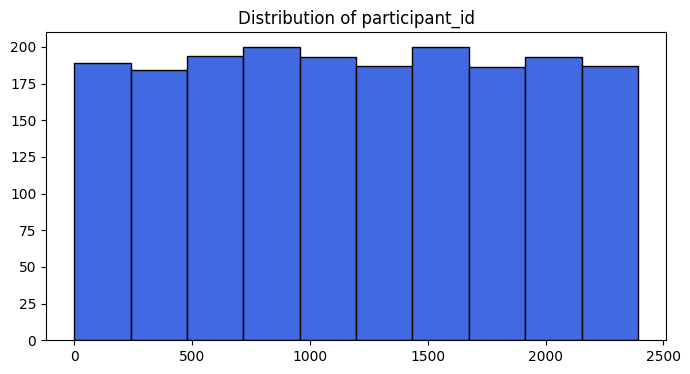

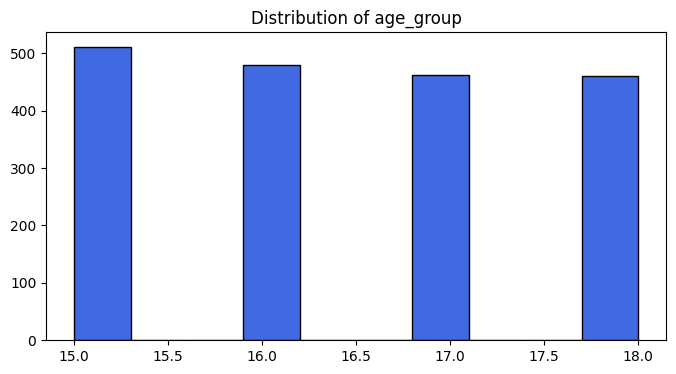

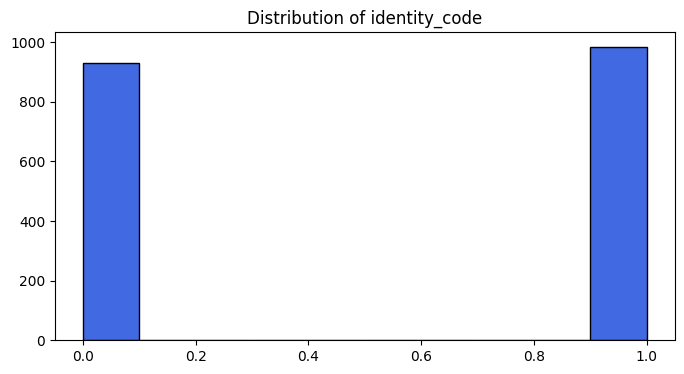

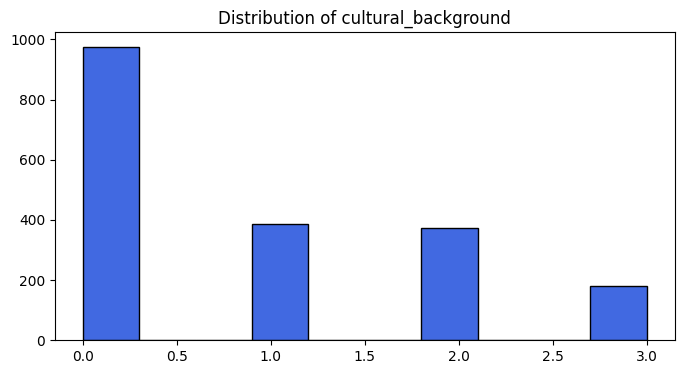

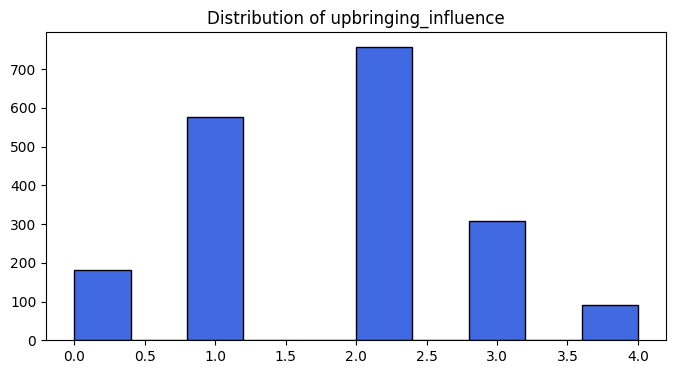

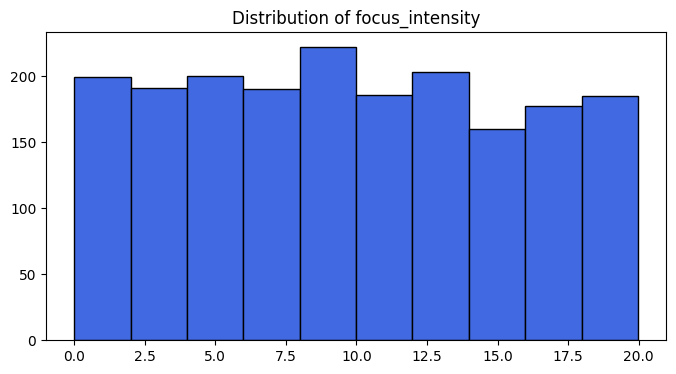

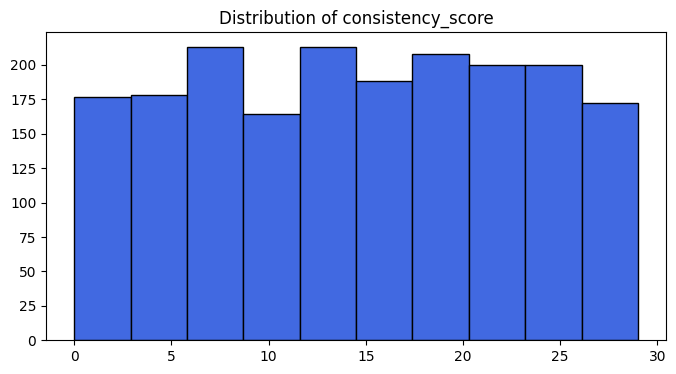

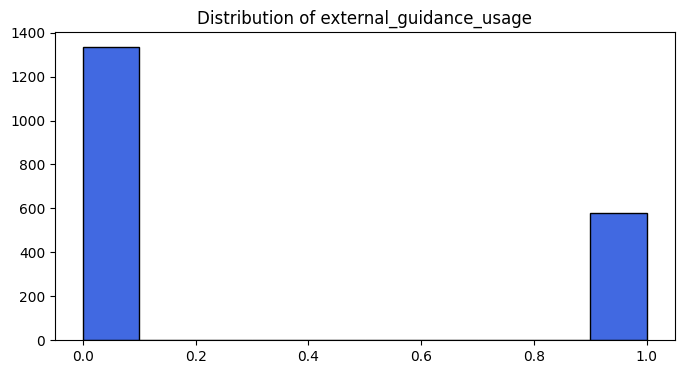

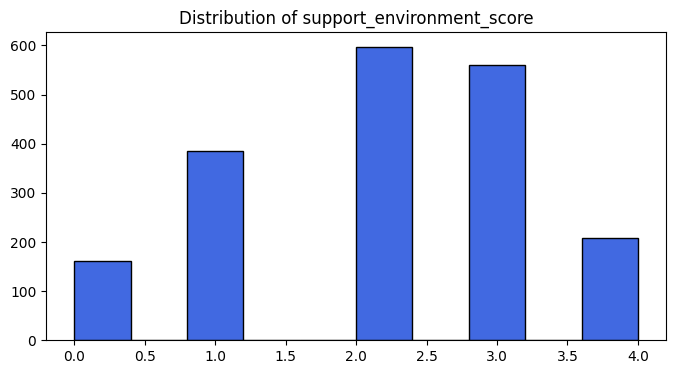

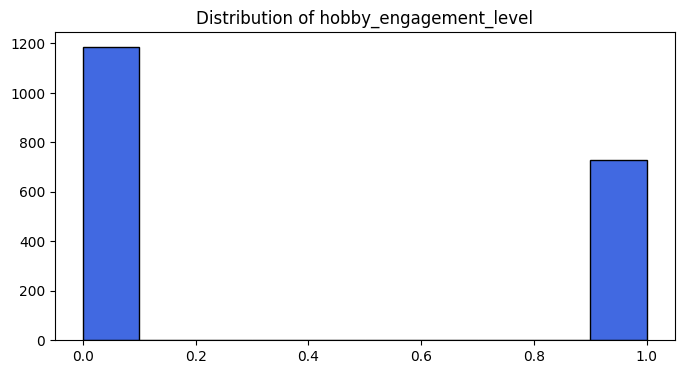

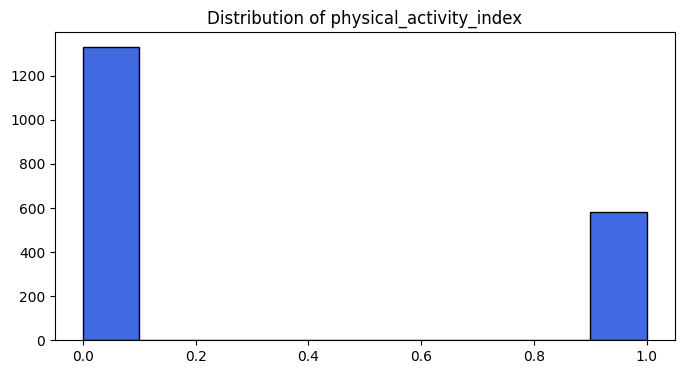

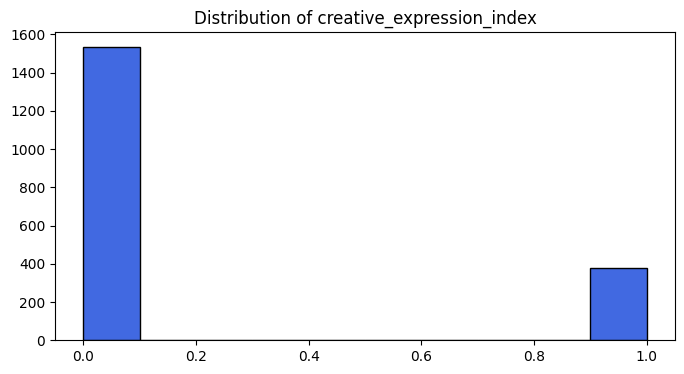

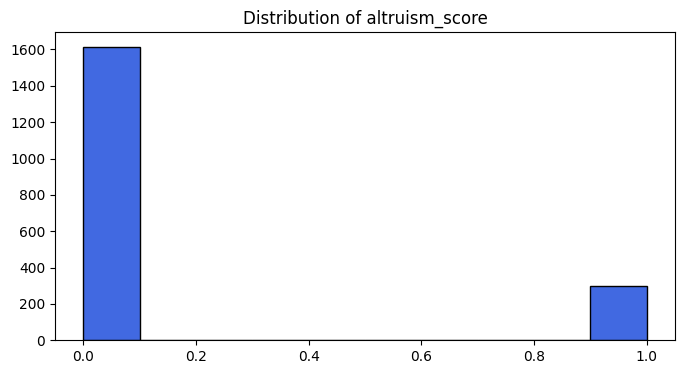

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


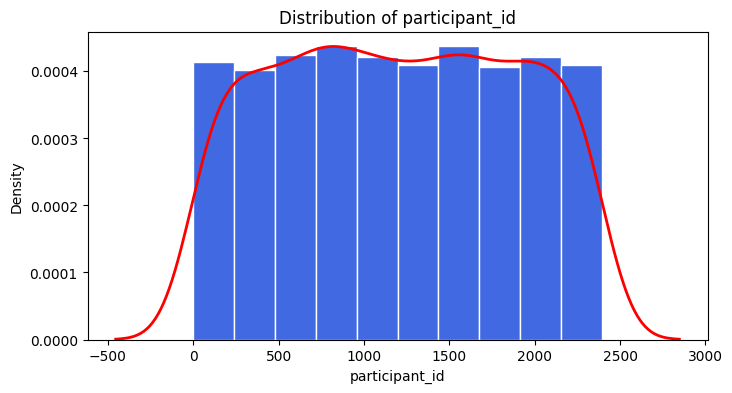

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


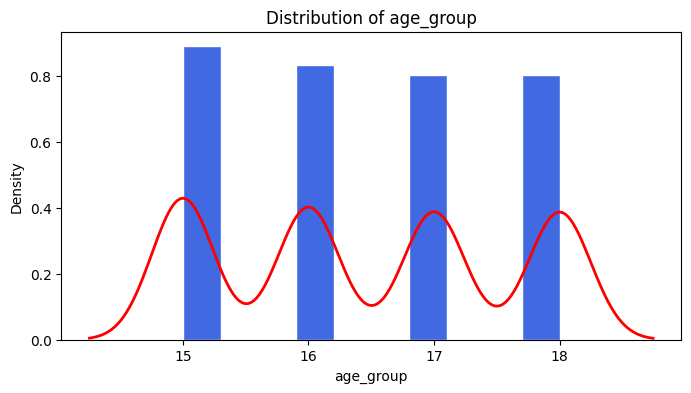

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


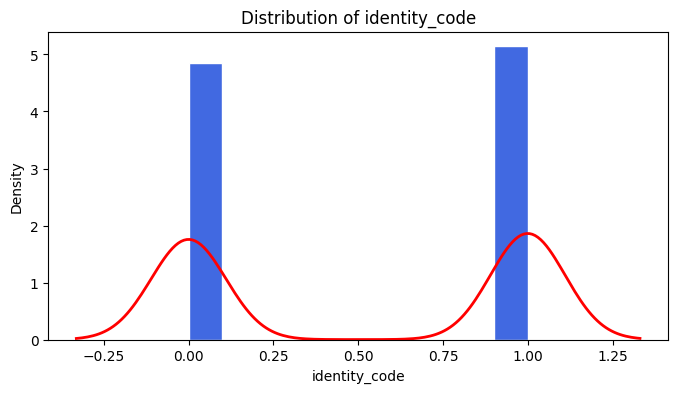

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


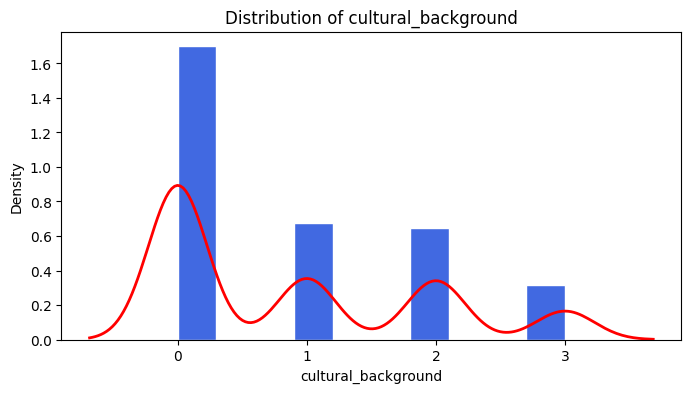

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


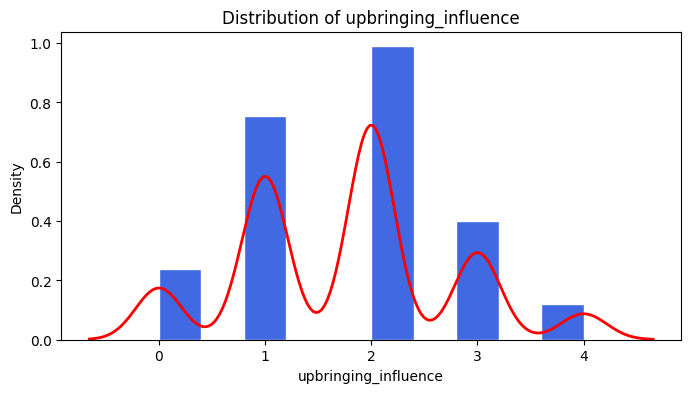

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


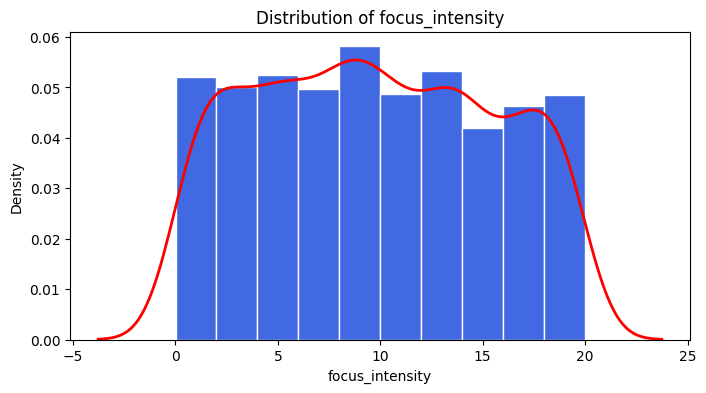

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


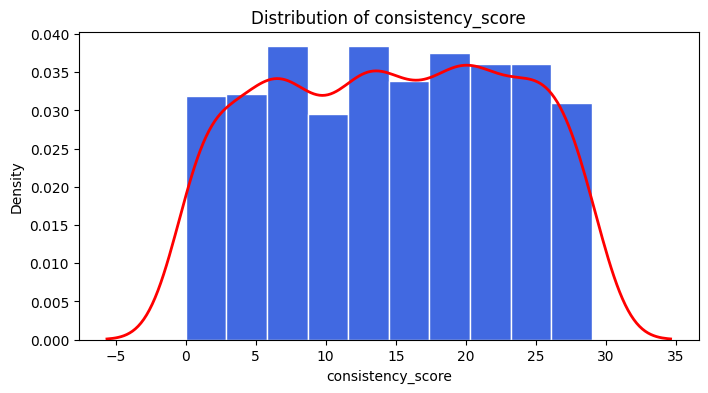

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


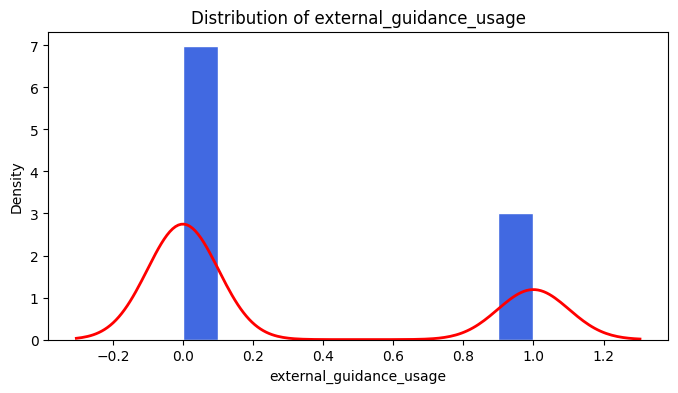

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


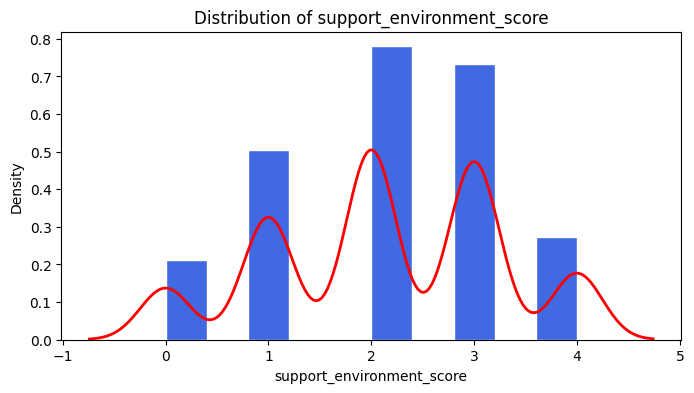

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


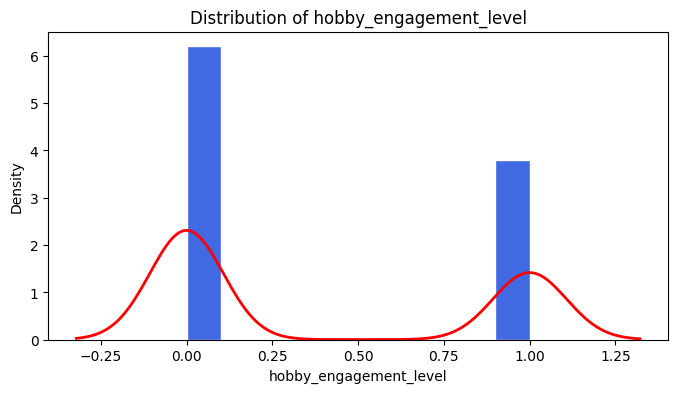

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


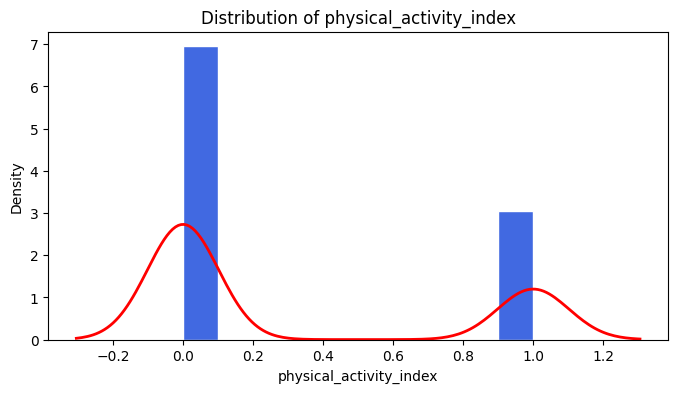

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


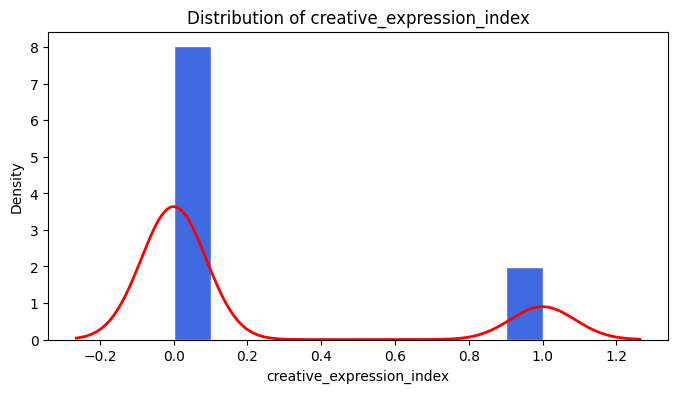

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


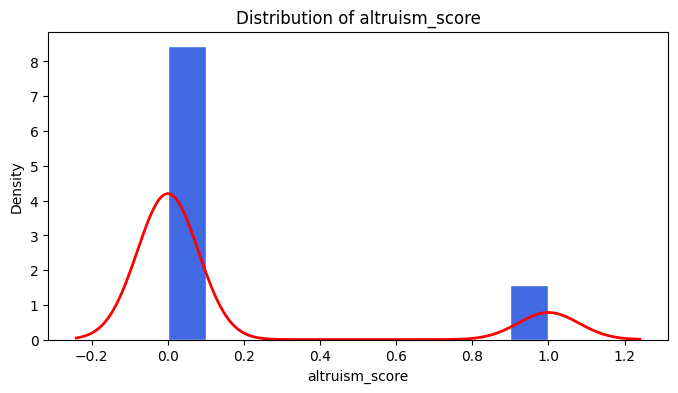

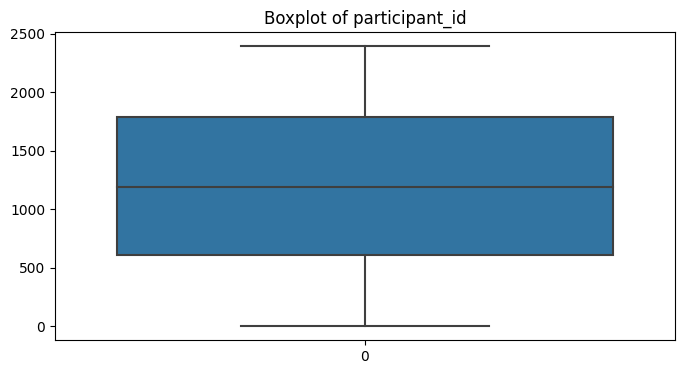

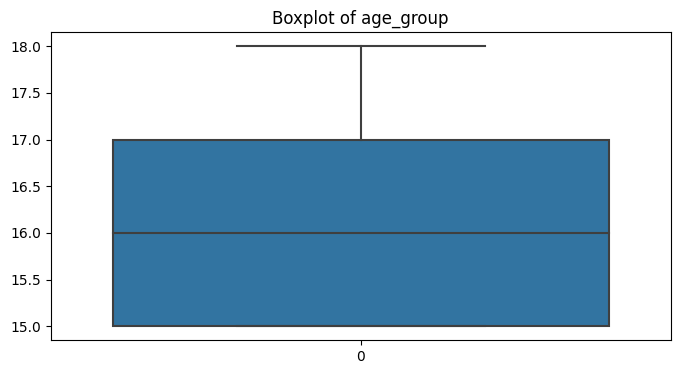

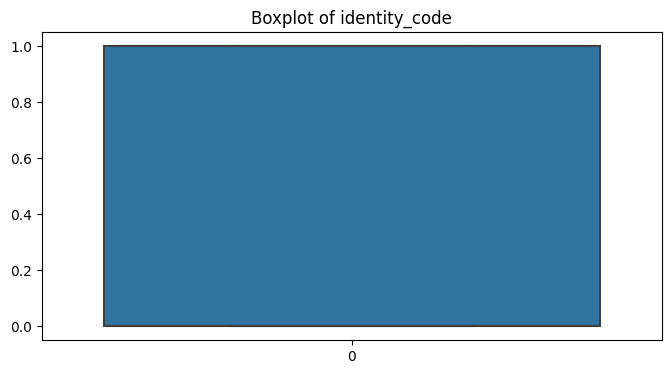

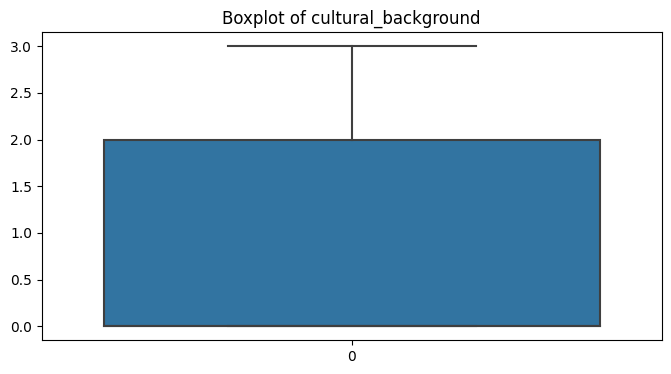

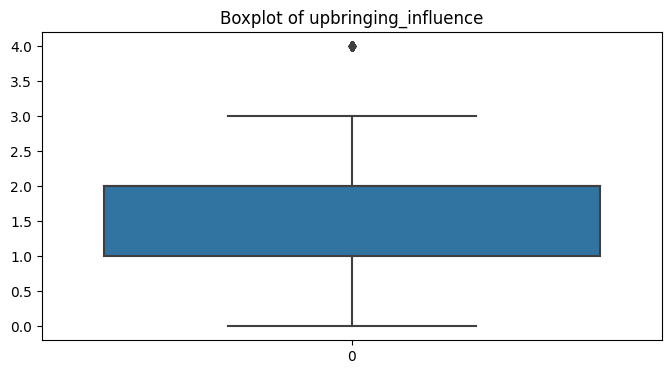

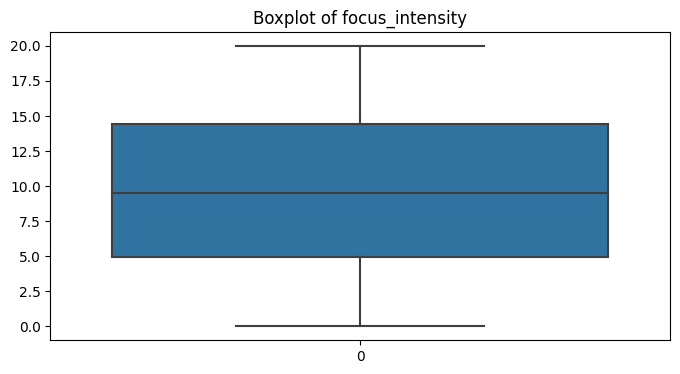

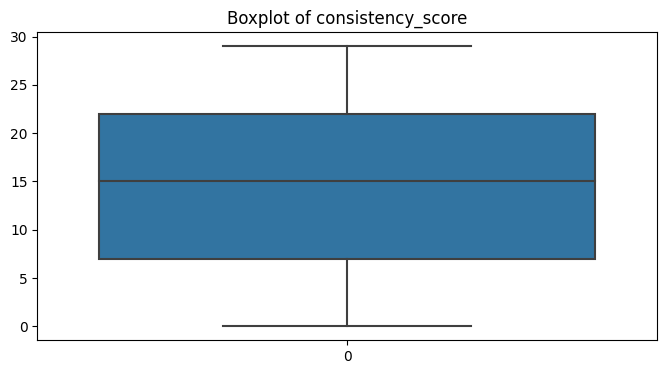

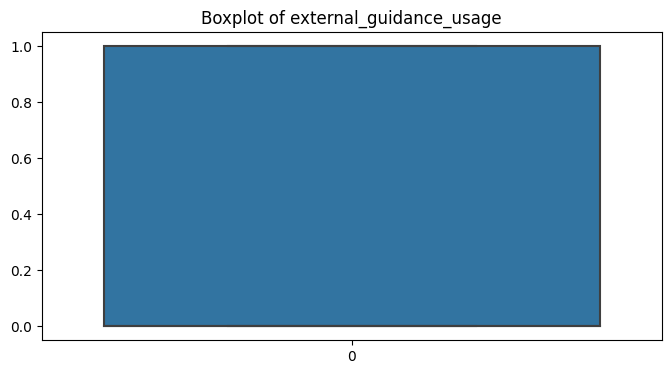

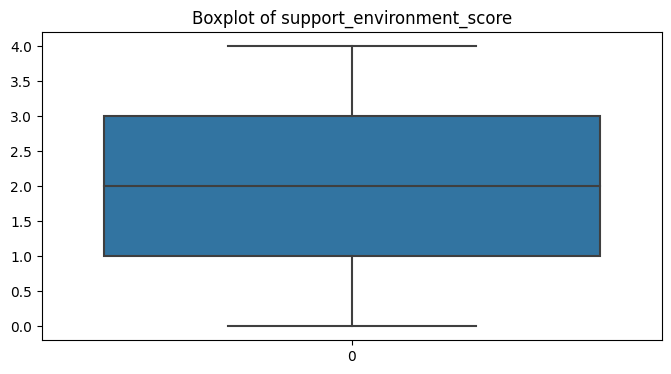

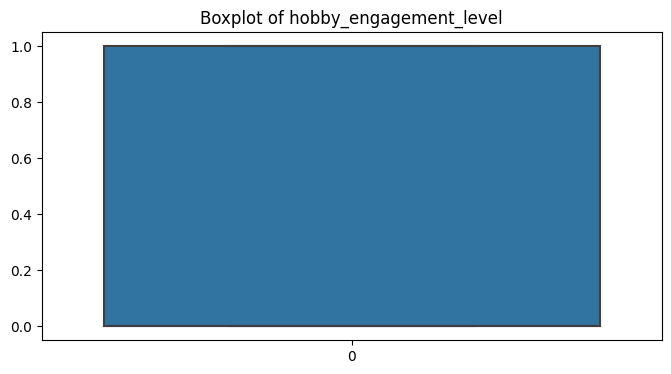

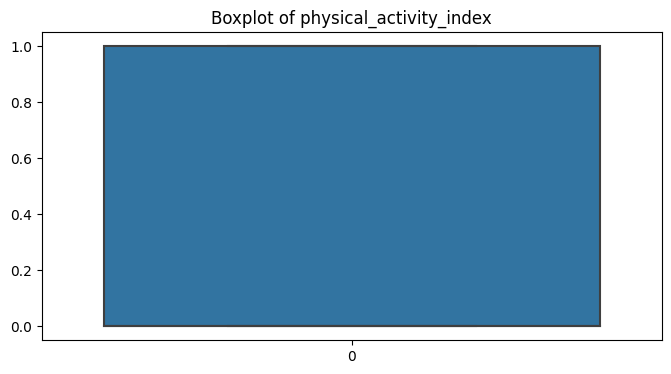

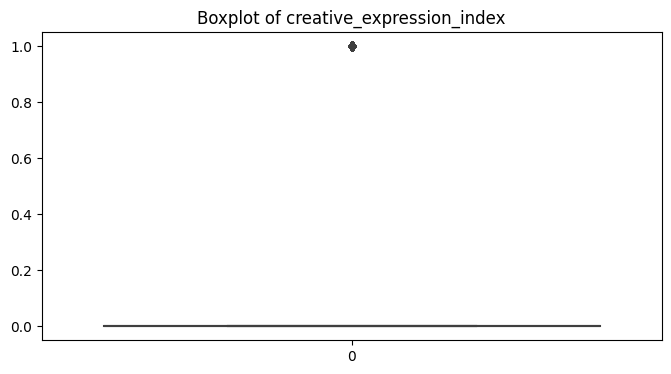

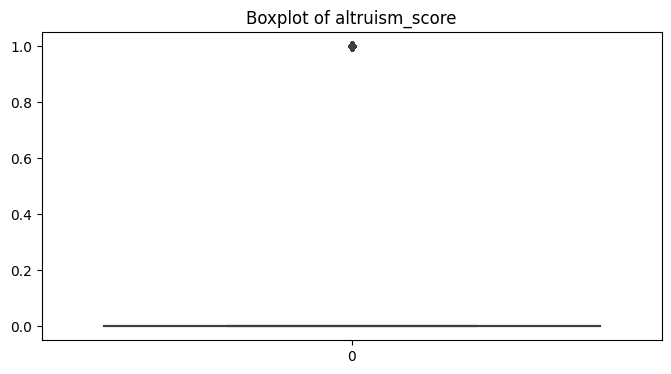

In [9]:
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns #Numerical columns
cat_cols = df_train.select_dtypes(include=['object']).columns
#Plotting distributions of numerical columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df_train[col], bins=10, color='royalblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.show()
#Plotting distributions and fitting Kernel density estimate which estimates PDF of the data
for col in num_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df_train[col], bins=10, color='royalblue', edgecolor='white',density=True)
    sns.kdeplot(df_train[col], color='red', linewidth=2)
    plt.title(f'Distribution of {col}')
    plt.show()

#Plotting boxplots for outlier detection
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df_train[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

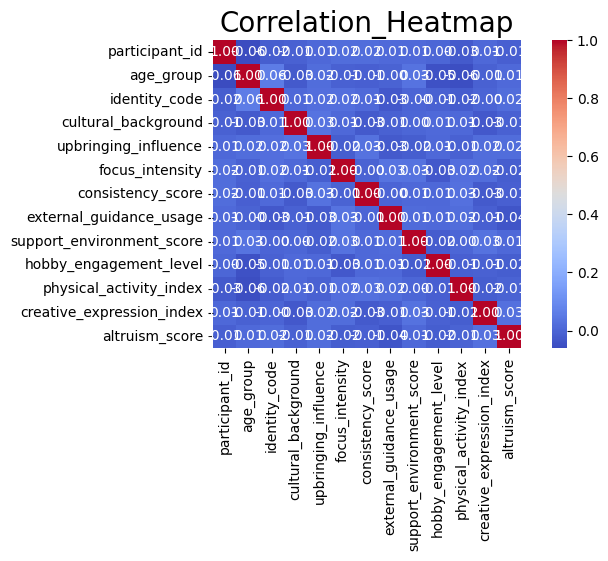

Numerical columns:['participant_id', 'age_group', 'identity_code', 'cultural_background', 'upbringing_influence', 'focus_intensity', 'consistency_score', 'external_guidance_usage', 'support_environment_score', 'hobby_engagement_level', 'physical_activity_index', 'creative_expression_index', 'altruism_score']
Categorical columns:['personality_cluster']


In [10]:
corr=df_train[num_cols].corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation_Heatmap", fontsize=20)
plt.show()

print(f"Numerical columns:{num_cols.tolist()}")
print(f"Categorical columns:{cat_cols.tolist()}")

In [11]:
def create_better_features(df):
    df = df.copy()
    df["total_engagement"] = (df["hobby_engagement_level"]+df["physical_activity_index"]+df["creative_expression_index"]+df["altruism_score"])
    df['support_vs_consistency'] = df['support_environment_score'] / (df['consistency_score'] + 1)
    return df
def drop_original_features(df):
    features_to_drop=["hobby_engagement_level","physical_activity_index","creative_expression_index","altruism_score"]
    return df.drop(columns=features_to_drop, errors='ignore')

test_ids = df_test['participant_id']
y_train = df_train['personality_cluster']
X_train_fe = create_better_features(df_train.drop(columns=['participant_id', 'personality_cluster']))
X_test_fe = create_better_features(df_test.drop(columns=['participant_id']))
X_train_final = drop_original_features(X_train_fe)
X_test_final = drop_original_features(X_test_fe) 

In [12]:
ordinal_features = X_train_final.columns.tolist()
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), ordinal_features)],remainder='passthrough' )



macro_f1_scorer = make_scorer(f1_score, average='macro')


knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])



param_grid = {'classifier__n_neighbors': np.arange(5, 36, 2), 'classifier__weights': ['uniform', 'distance']}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


grid_search_knn = GridSearchCV(
    knn_pipeline, 
    param_grid, 
    cv=cv, 
    scoring=macro_f1_scorer, 
    verbose=2, 
    n_jobs=-1
)



grid_search_knn.fit(X_train_final, y_train)




best_knn_model = grid_search_knn.best_estimator_

print("Best Model Parameters are: \n")
print(grid_search_knn.best_params_)
print(f"Best Macro F1 Score (CV): {grid_search_knn.best_score_:.4f}")


test_predictions = best_knn_model.predict(X_test_final)

# Create submission DataFrame
df_submission = pd.DataFrame({
    'participant_id': test_ids,
    'personality_cluster': test_predictions
})

# Save the submission file
submission_filename = "submission.csv"
df_submission.to_csv(submission_filename, index=False)

print(" Submission file created")



Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Model Parameters are: 

{'classifier__n_neighbors': 9, 'classifier__weights': 'uniform'}
Best Macro F1 Score (CV): 0.4622
 Submission file created
